Sentence Pair Relationship Classification

In this notebook, we will train a model to classify the relationship between two sentences. 

The dataset we will use is the Stanford Natural Language Inference (SNLI) dataset, which contains 550,000 sentence pairs labeled with a relationship between them (entailment, contradiction, or neutral).

Entailment: The first sentence implies the second sentence. For example, "The sun is hot." and "The sun has high temprature." are classified as entailment since the first sentence implies the second sentence because the sun can have high temprature if it is hot.

Contradiction: The first sentence contradicts the second sentence. For example, "The sun is hot." and "The sun has low temprature." are classified as contradiction since the first sentence contradicts the second sentence because the sun cannot have low temprature if it is hot.

Neutral: The first sentence does not imply or contradict the second sentence. For example, "The sun is shining." and "I am a boy." are classified as neutral because both the sentences are not related to each other at all.

In [ ]:
import pandas as pd # import pandas library to create and use dataframes

df = pd.read_csv("snli_1.0_train.csv") # create a dataframe of SNLI training CSV file

df = df[['sentence1','sentence2','label1']] # take only the two sentences and their classification columns from the dataframe

In [2]:
print(df) # take a look at the dataframe created

                                                sentence1  \
0       A person on a horse jumps over a broken down a...   
1       A person on a horse jumps over a broken down a...   
2       A person on a horse jumps over a broken down a...   
3                   Children smiling and waving at camera   
4                   Children smiling and waving at camera   
...                                                   ...   
550147                Four dirty and barefooted children.   
550148                Four dirty and barefooted children.   
550149  A man is surfing in a bodysuit in beautiful bl...   
550150  A man is surfing in a bodysuit in beautiful bl...   
550151  A man is surfing in a bodysuit in beautiful bl...   

                                                sentence2         label1  
0       A person is training his horse for a competition.        neutral  
1           A person is at a diner, ordering an omelette.  contradiction  
2                       A person is outdoo

In [3]:
df = df.sample(n=5000, random_state=42).reset_index(drop=True) # reduce the dataframe to 5000 random samples and reset the index to start from 0, random_state = 42 makes sure that every time the same set of 5000 samples are randomly selected

In [4]:
print(df) # take a look at the dataframe after reducing it to 5000 random samples

                                              sentence1  \
0     An older gentleman in an orange jumpsuit and g...   
1                 Boy and girl running along the beach.   
2                    Four men do repair work on a roof.   
3     A long-haired young man skateboarding on the r...   
4                             A band performs on stage.   
...                                                 ...   
4995  An older gentleman holding a can of coke and a...   
4996  The gutarist upfront is under a spotlight, and...   
4997   A boy in a white t-shirt does skateboard tricks.   
4998  Two men are driving in opposite directions on ...   
4999  A worker begins to make renovations to the out...   

                                      sentence2         label1  
0        A man is cleaning up around his house.        neutral  
1                  Two people run on the beach.     entailment  
2                     Four men work with tools.     entailment  
3                      A girl i

Time for data cleaning to make the data ready for training.

In [5]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS # import english stop words from scikit-learn library like 'and', 'the', 'is' etc.

# convert all values of columns 'sentence1' and 'sentence2' to lower case using lambda function
df['sentence1'] = df['sentence1'].apply(lambda x: x.lower())
df['sentence2'] = df['sentence2'].apply(lambda x: x.lower())

# remove stop words from columns 'sentence1' and'sentence2' using lambda function
df['sentence1'] = df['sentence1'].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))
df['sentence2'] = df['sentence2'].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

# first x.split() splits the sentence into a list of words, for example, the sentence "hello john how are you" becomes ['hello', 'john', 'how', 'are', 'you']
# then a loop iterates over each word in the list and removes the word not in ENGLISH_STOP_WORDS, for exmample, ['hello', 'john' 'how', 'are', 'you'] becomes ['hello', 'john'] since 'how', 'are' and 'you' are english stop words
# finally, the join() function joins the list of words back into a string with a white space as separator, for example, ['hello', 'john'] becomes 'hello john'

In [6]:
print(df) # take a look at the dataframe after removing stop words from the sentences

                                              sentence1  \
0     older gentleman orange jumpsuit gray hat curb ...   
1                               boy girl running beach.   
2                                 men repair work roof.   
3     long-haired young man skateboarding rails clou...   
4                                  band performs stage.   
...                                                 ...   
4995  older gentleman holding coke young boy sort ma...   
4996           gutarist upfront spotlight, drummer too.   
4997          boy white t-shirt does skateboard tricks.   
4998  men driving opposite directions motorbikes man...   
4999   worker begins make renovations outside building.   

                           sentence2         label1  
0                man cleaning house.        neutral  
1                  people run beach.     entailment  
2                    men work tools.     entailment  
3                  girl riding bike.  contradiction  
4     people listenin

In [7]:
df = df[df['label1'] != 'neutral'] # remove rows from the dataframe for which value of column 'label1' is 'neutral'
df['input'] = df['sentence1'] + " " + df['sentence2'] # create a new column 'input' by concatenating values of corresponding values of columns 'sentence1' and 'sentence2' with a white space b/w them as separator

In [8]:
print(df) # take a look at the dataframe after creating new column 'input'

                                              sentence1  \
1                               boy girl running beach.   
2                                 men repair work roof.   
3     long-haired young man skateboarding rails clou...   
7     hispanic ladies wearing bright clothing crossi...   
8     young boy stands golf mat city horizon, golf c...   
...                                                 ...   
4994                  police horseback outside protest.   
4995  older gentleman holding coke young boy sort ma...   
4996           gutarist upfront spotlight, drummer too.   
4998  men driving opposite directions motorbikes man...   
4999   worker begins make renovations outside building.   

                                  sentence2         label1  \
1                         people run beach.     entailment   
2                           men work tools.     entailment   
3                         girl riding bike.  contradiction   
7                            people female.

Time to train the model now. First step is to split the data into training and validation sets.

In [9]:
from sklearn.model_selection import train_test_split # import 'train_test_split' function from scikit-learn library to split the data into training and testing sets

X = df[['input']] # input feature for training will only be the 'input' column from the dataframe
y = df['label1'] # output label for training will be the 'label1' column from the dataframe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# split the data into training and testing sets using the 'train_test_split' function from scikit-learn library
# X_train and y_train will be used to train the model, while X_test and y_test will be used to evaluate the model's performance
# test_size=0.2 means that 20% of the data will be used for testing, and the remaining 80% will be used for training
# random_state=42 ensures that the split will be the same every time the code is run
# stratify=y ensures that the proportion of each class in the output label is the same in both the training and testing sets
# this means that ratio of rows with label 'entailment' 'contradiction' and 'neutral' will be the same in both the training and testing sets to avoid any bias in the model's performance

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer # import TF-IDF vectorizer from scikit-learn library to convert text data into numerical features since machine learning algorithms require numerical input to learn patterns from data

tfidf = TfidfVectorizer() # create an instance of the TF-IDF vectorizer to use it

X_train_tfidf = tfidf.fit_transform(X_train['input']) # fit the TF-IDF vectorizer on training text to learn vocabulary and compute tf-idf scores, then transform the training text into numeric feature vectors
X_test_tfidf = tfidf.transform(X_test['input']) # use the same learned vocabulary to transform test text into tf-idf numeric feature vectors without refitting to prevent data leakage

Training Logistic Regression...
Classification Report for Logistic Regression:

               precision    recall  f1-score   support

contradiction       0.61      0.64      0.63       347
   entailment       0.60      0.56      0.58       328

     accuracy                           0.60       675
    macro avg       0.60      0.60      0.60       675
 weighted avg       0.60      0.60      0.60       675

Confusion Matrix for Logistic Regression:

[[223 124]
 [143 185]]


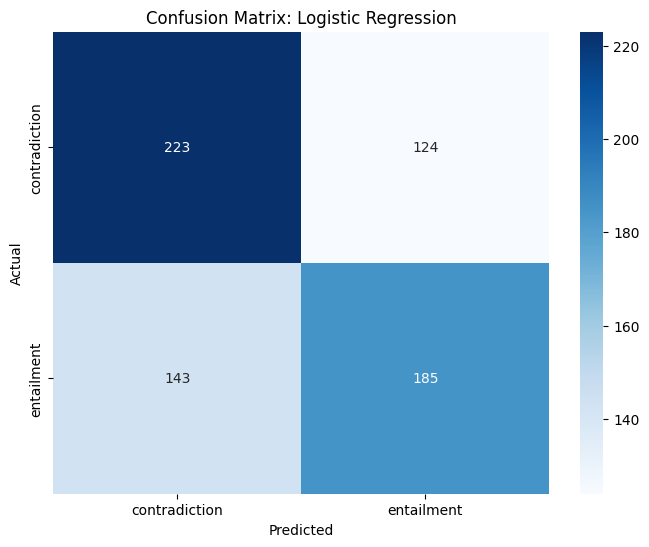

Training Random Forest...
Classification Report for Random Forest:

               precision    recall  f1-score   support

contradiction       0.64      0.57      0.60       347
   entailment       0.59      0.66      0.63       328

     accuracy                           0.62       675
    macro avg       0.62      0.62      0.62       675
 weighted avg       0.62      0.62      0.62       675

Confusion Matrix for Random Forest:

[[198 149]
 [110 218]]


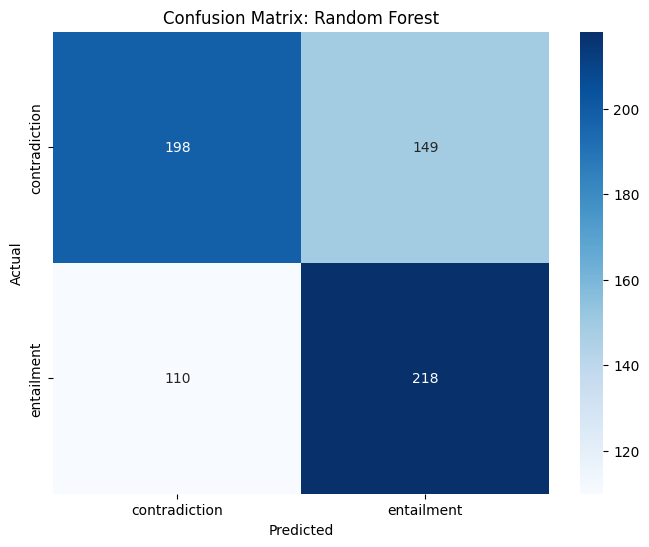

Training SVM...
Classification Report for SVM:

               precision    recall  f1-score   support

contradiction       0.60      0.62      0.61       347
   entailment       0.59      0.56      0.57       328

     accuracy                           0.59       675
    macro avg       0.59      0.59      0.59       675
 weighted avg       0.59      0.59      0.59       675

Confusion Matrix for SVM:

[[216 131]
 [143 185]]


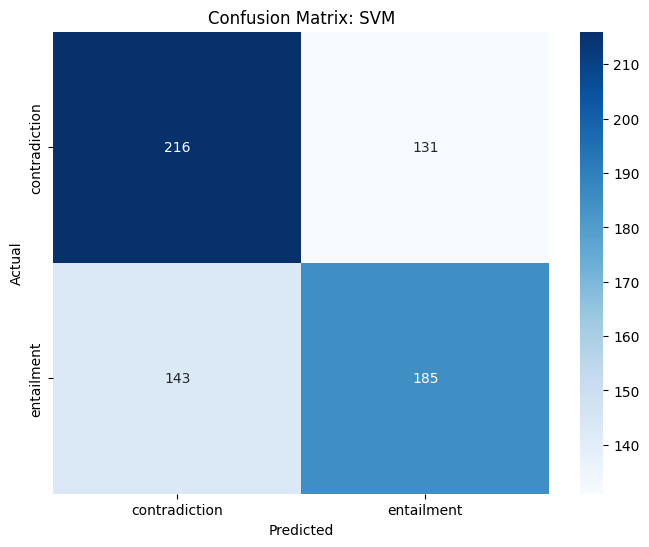

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# create a list of models to train them sequentially
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(kernel='linear'))
]

# loop through models to train them, test them and print classification report, confusion matrix and heat map for each model created
for name, model in models:
    print(f"Training {name}...")

    model.fit(X_train_tfidf, y_train)
    
    y_pred = model.predict(X_test_tfidf)
    
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    
    print(f"Confusion Matrix for {name}:\n")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("=" * 50)

Based on various parameters like accuracy, precision, recall, f1 score, and support, the best model for the given dataset is the Random Forest Classifier. Hence, we will use this model for our prediction.

In [12]:
model = LogisticRegression()

model.fit(X_train_tfidf, y_train) # train the model

y_pred = model.predict(X_test_tfidf) # make predictions

# print classification report
print(f"Classification Report :\n")
print(classification_report(y_test, y_pred))

# print confusion matrix
print(f"Confusion Matrix for:\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Classification Report :

               precision    recall  f1-score   support

contradiction       0.61      0.64      0.63       347
   entailment       0.60      0.56      0.58       328

     accuracy                           0.60       675
    macro avg       0.60      0.60      0.60       675
 weighted avg       0.60      0.60      0.60       675

Confusion Matrix for:

[[223 124]
 [143 185]]


Next step is to creaet a function that will take the two input sentences, trained model and the vectorizer as argument.

In [13]:
def detect(inp1, inp2, model, tfidf):
    combined_input = inp1 + " " + inp2 # combine the two input sentences separated by a single white space
    
    combined_input = combined_input.lower() # convert the concatenated sentence to lowercase
    
    transformed_input = tfidf.transform([combined_input]) # transform the combined input using the TF-IDF vectorizer
    
    prediction = model.predict(transformed_input) # predict the output label using the trained model
    
    return prediction[0] # return the predicted output label with [0] since it is returned in a list format

Now let's make predictions on some test input.

In [15]:
inp1 = "A man is playing a guitar."
inp2 = "A man is riding a bike."

prediction = detect(inp1, inp2, model, tfidf)
print(f"Prediction: {prediction}") # expected output: "contradiction"

Prediction: contradiction


In [16]:
inp1 = "Two people are having a conversation."
inp2 = "Two people are talking to each other."

prediction = detect(inp1, inp2, model, tfidf)
print(f"Prediction: {prediction}") # expected output: "entailment"

Prediction: entailment


In [19]:
# export vectorizer and predictor model in serialized form using pickle module
import pickle
pickle.dump(model,open("model.pkl",'wb'))
pickle.dump(tfidf,open("tfidf.pkl",'wb'))